Asteroid data fitting problem solution

In [1]:
#importing modules
import csv
import matplotlib.pyplot as plt
import numpy as np
from math import pi

Reading the data

In [2]:
#reading csv file

file = open('asteroid_data.csv')
csvreader = csv.reader(file)
x_coords = []
y_coords = []

#variables to be optimized for ellipse of given shape
vx,vy = 0,0

for row in csvreader:
    x_coords.append(row[0])
    y_coords.append(row[1])
file.close()

#converting list of strings to numpy float array
X = np.asfarray(x_coords)
#print("X.size ",X.size)
X = np.asfarray(x_coords).reshape([X.size,1])
#print("X.sizeNp ",X.shape)

Y = np.asfarray(y_coords).reshape([X.shape[0],1])

The ellipse equation is
$$\frac{x_i^2}{v_x^2}+\frac{y_i^2}{v_y^2}=1$$ 
We need the S to be close to zero in the below equation
$$S=\sum_{i = 1}^{n}{(\frac{x_i^2}{v_x^2}+\frac{y_i^2}{v_y^2}-1)^2}$$
Taking partial derivative w.r.t $v_x$ and $v_y$ and equate both to 0

$$\frac{\partial S}{\partial v_x} = \frac{\partial}{\partial v_x} {\sum_{i = 1}^{n}{(\frac{x_i^2}{v_x^2}+\frac{y_i^2}{v_y^2}-1)^2}} = 0$$

$$\implies       \sum_{i = 1}^{n}\frac{x_i^4}{v_x^2}+\sum_{i = 1}^{n}\frac{x_i^2.y_i^2}{v_y^2} =  \sum_{i = 1}^{n}x_i^2$$

And

$$\frac{\partial S}{\partial v_y} = \frac{\partial}{\partial v_y} {\sum_{i = 1}^{n}{(\frac{x_i^2}{v_x^2}+\frac{y_i^2}{v_y^2}-1)^2}} = 0 $$

$$\implies       \sum_{i = 1}^{n}\frac{x_i^2.y_i^2}{v_x^2}+\sum_{i = 1}^{n}\frac{y_i^4}{v_y^2} =  \sum_{i = 1}^{n}y_i^2$$

These two equations can be written in martix form as

$$\begin{bmatrix} \sum_{i = 1}^{n}x_i^4 & \sum_{i = 1}^{n}x_i^2y_i^2  \\ \sum_{i = 1}^{n}x_i^2y_i^2 & \sum_{i = 1}^{n}y_i^4 \end{bmatrix}
\begin{bmatrix} \frac{1}{v_x^2}   \\ \frac{1}{v_y^2}\end{bmatrix} = 
\begin{bmatrix} \sum_{i = 1}^{n}x_i^2   \\  \sum_{i = 1}^{n}y_i^2 \end{bmatrix}$$

Which is in the form $$ Ax=b $$

x can be found as  $$ x=A^{-1} b $$

In [3]:
x4=np.sum(np.power(X,4))
x2=np.sum(np.power(X,2))
x2y2=np.sum(np.multiply(np.power(X,2),np.power(Y,2)))
y4=np.sum(np.power(Y,4))
y2=np.sum(np.power(Y,2))

A=np.array([[x4, x2y2],
                [x2y2, y4]])
z=np.array([x2, y2])


parms=np.dot(np.linalg.inv(A),z.T)
print("parms = ",parms)
vx=1/(np.sqrt(parms[0]))
vy=1/(np.sqrt(parms[1]))
print("vx = ",vx, "    vy = ", vy )

parms =  [0.03210851 0.88629436]
vx =  5.58071574925297     vy =  1.062211522511347


Plotting

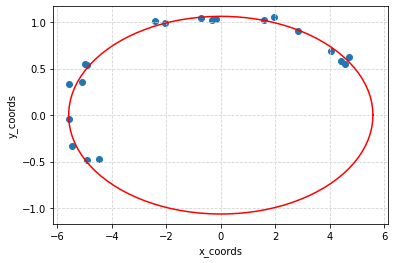

In [4]:
plt.scatter(X, Y)
plt.xlabel('x_coords')
plt.ylabel('y_coords')

t = np.linspace(0, 2*pi, 100)
#using parametric equation of ellipse to plot ellipse
plt.plot( vx*np.cos(t) , vy*np.sin(t),'r' )
plt.grid(color='lightgray',linestyle='--')
plt.show()